In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from operator import itemgetter
%matplotlib inline 

In [2]:
#загрузка датасета
IMDB=pd.read_csv('IMDB-Movie-Data.csv')
#из всех названий столбцов убираем заглавные буквы, заменяем пробелы подчеркиванием, убираем скобки
IMDB.columns = IMDB.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

IMDB.describe(include='all')

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",3 high school seniors throw a birthday party t...,Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [3]:
#размер дата сета
IMDB.shape

(1000, 12)

In [4]:
#просмотрим первые строки датасета
IMDB.head()

,rank,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
# подсчет уникальных жанров, тк большая часть фильмов относятся к нескольким жанрам
Genres = set()
for i in range(IMDB.shape[0]):
    eggs = IMDB['genre'][i].split(',')
    for spam in eggs:
        Genres.add(spam)
Genres = list(Genres)

C:\Users\Svet\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


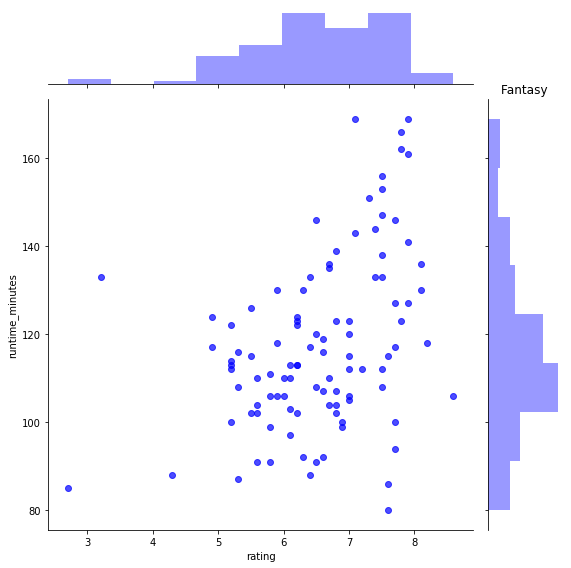

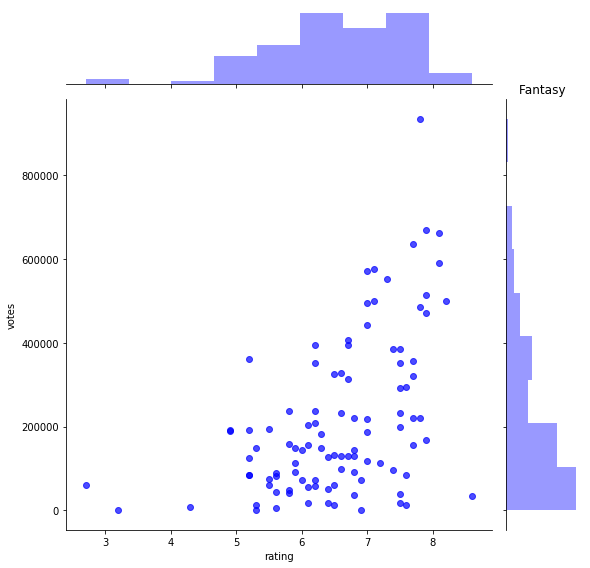

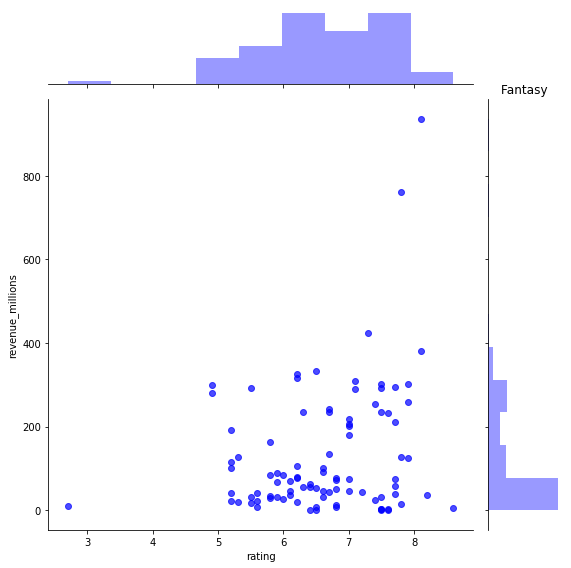

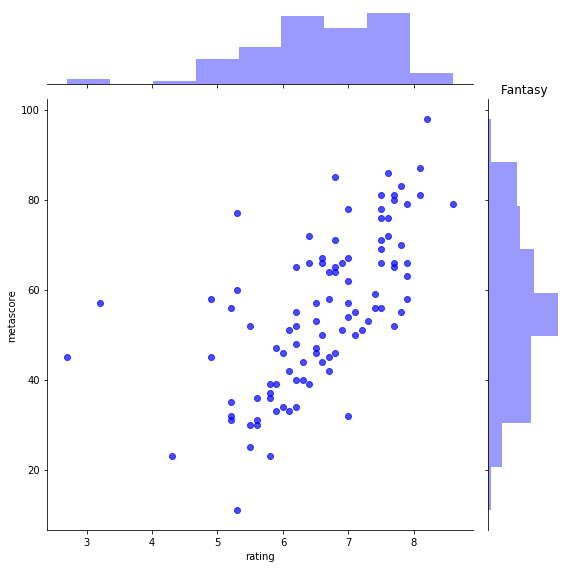

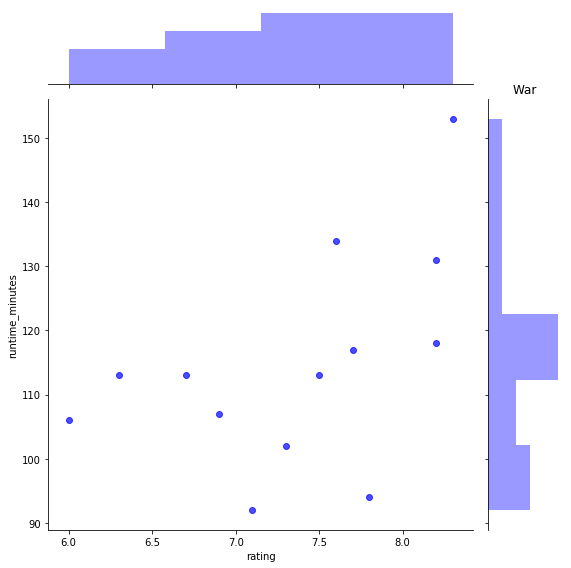

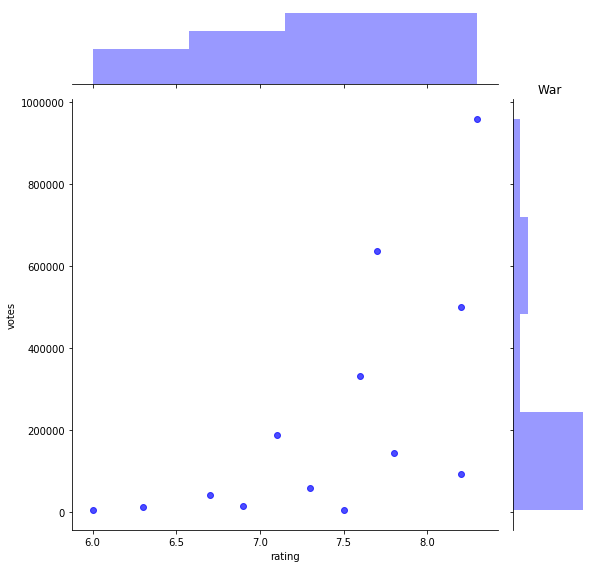

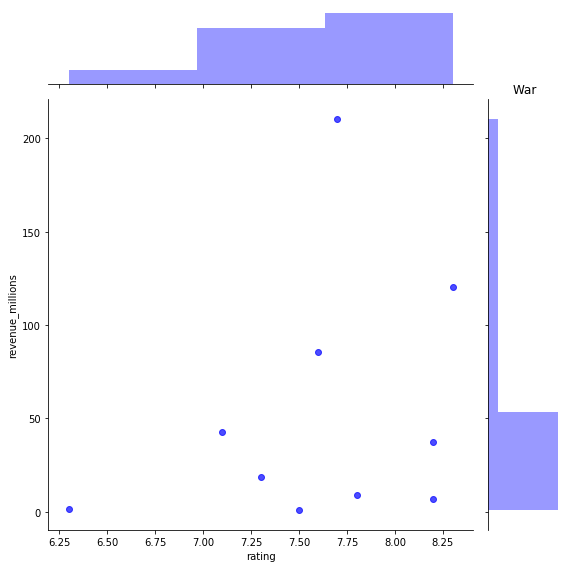

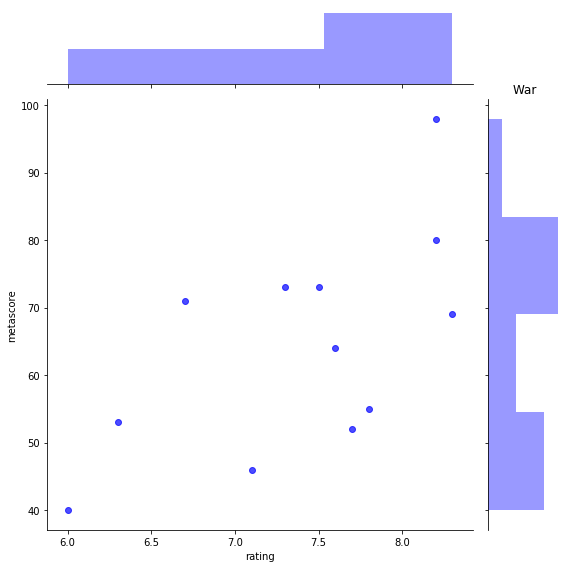

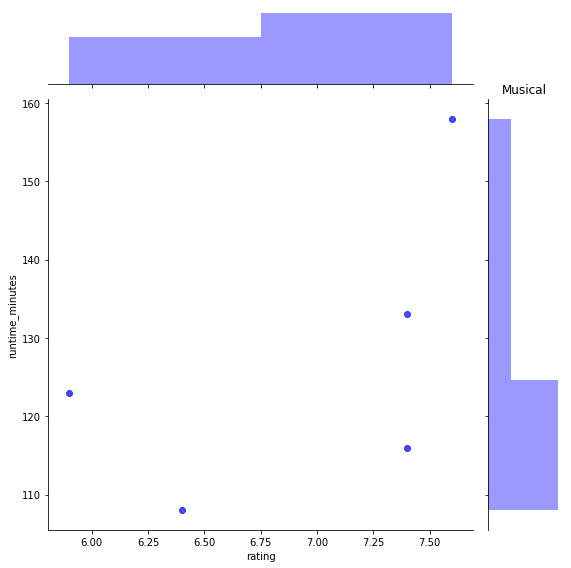

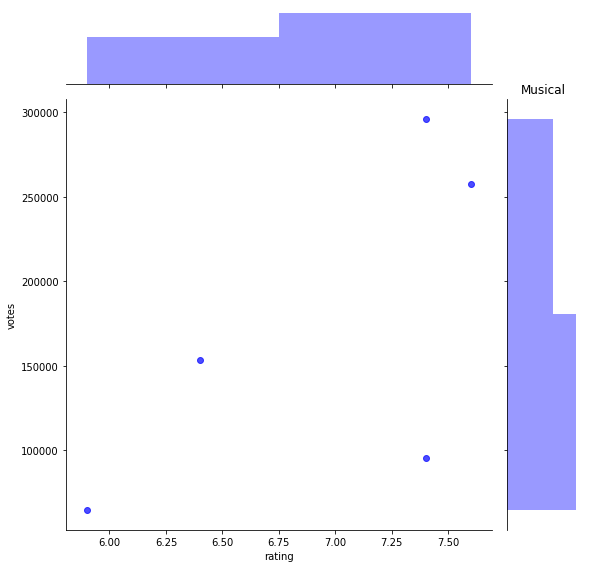

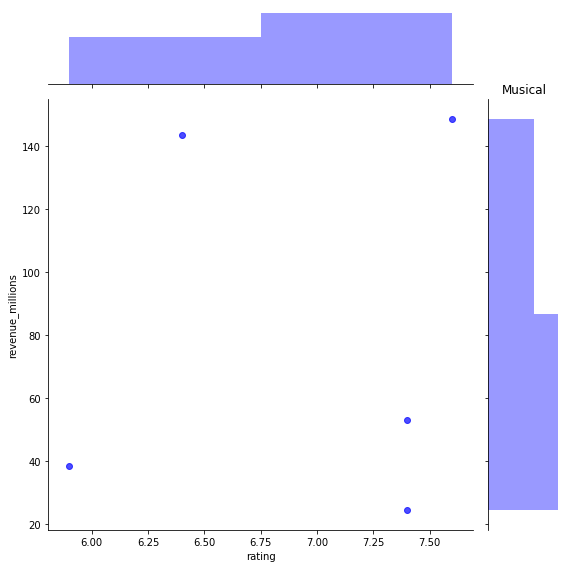

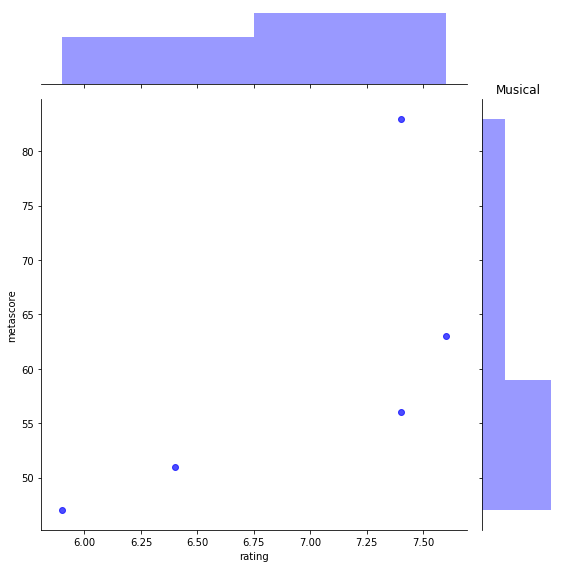

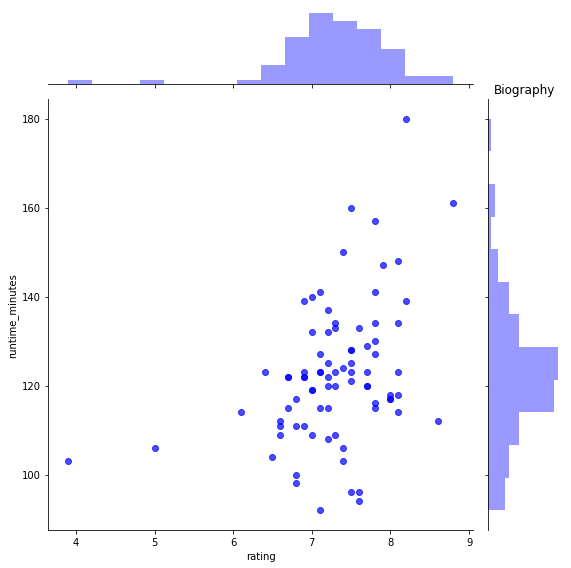

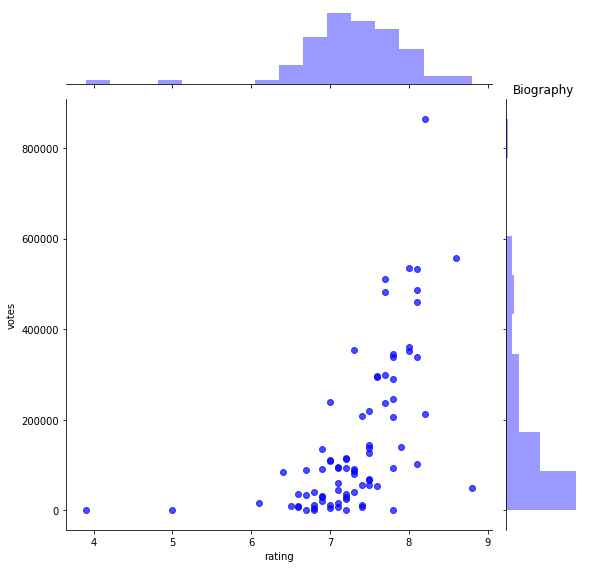

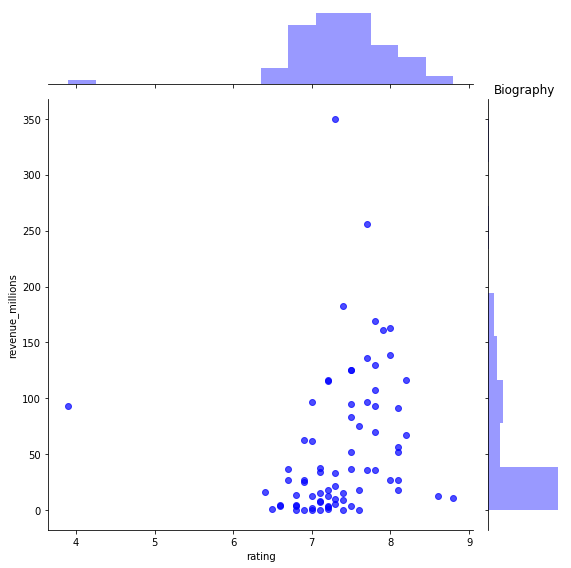

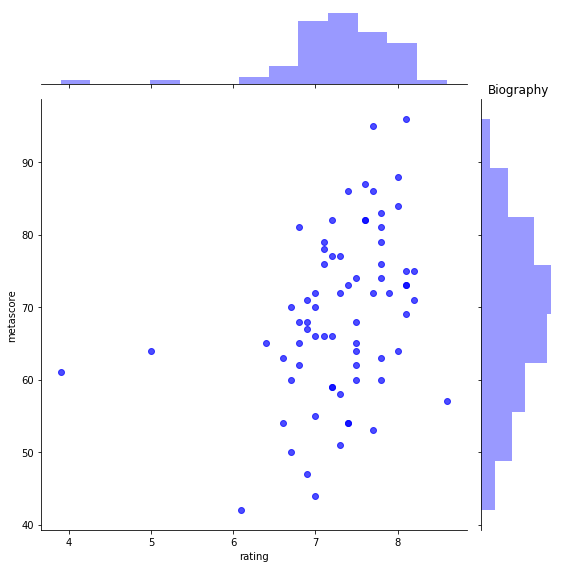

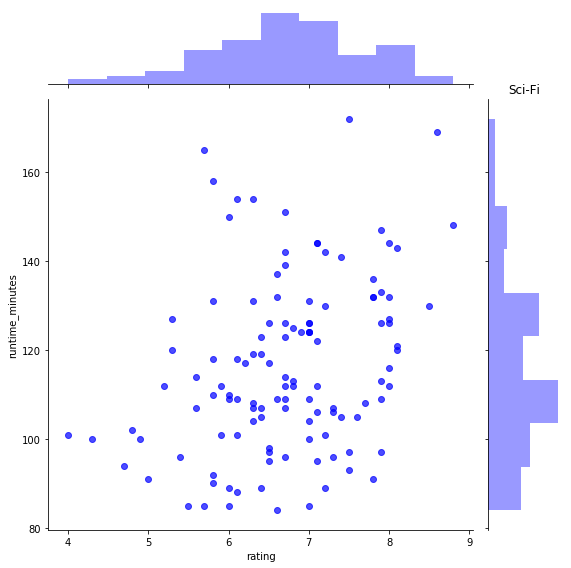

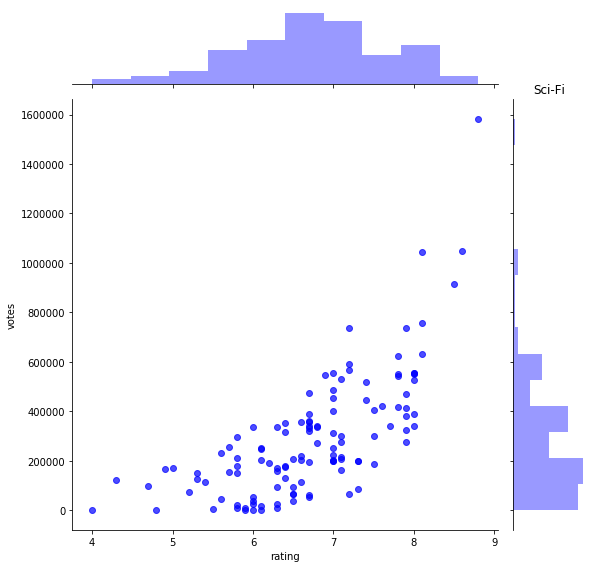

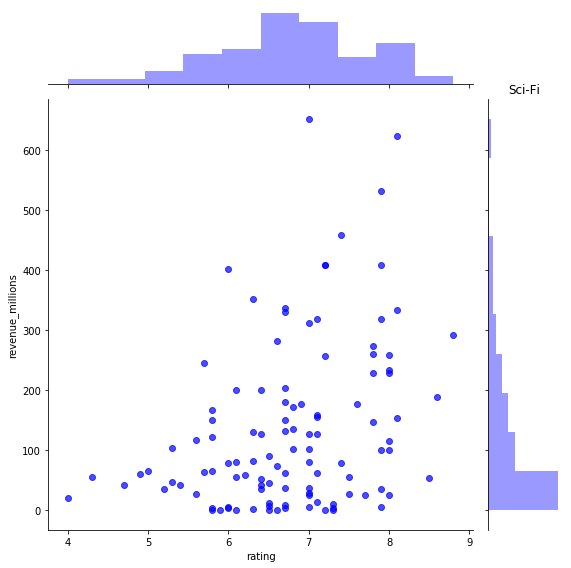

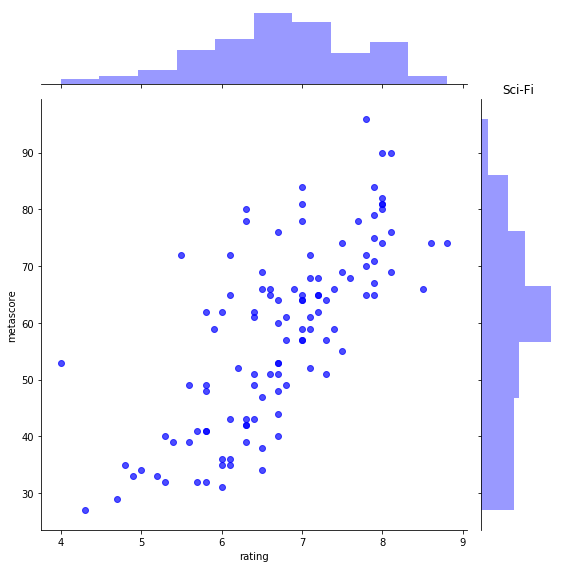

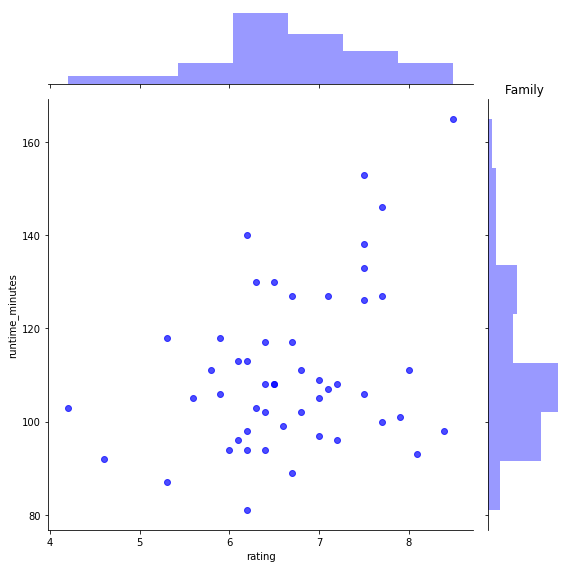

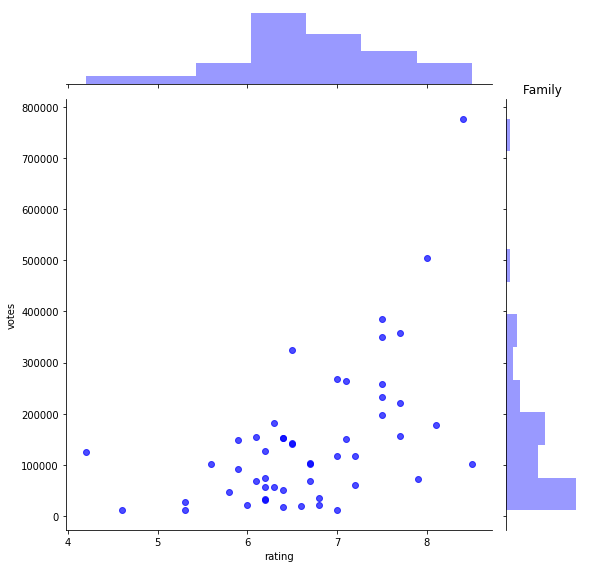

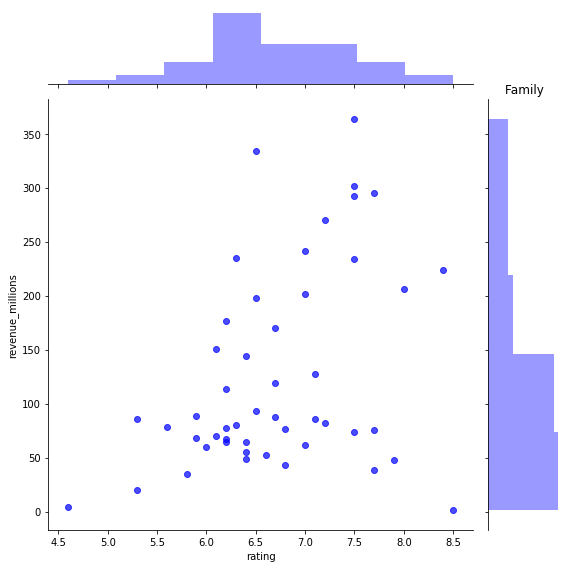

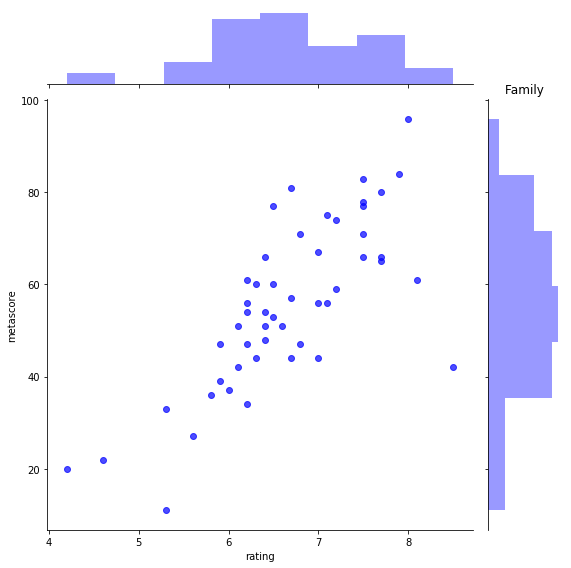

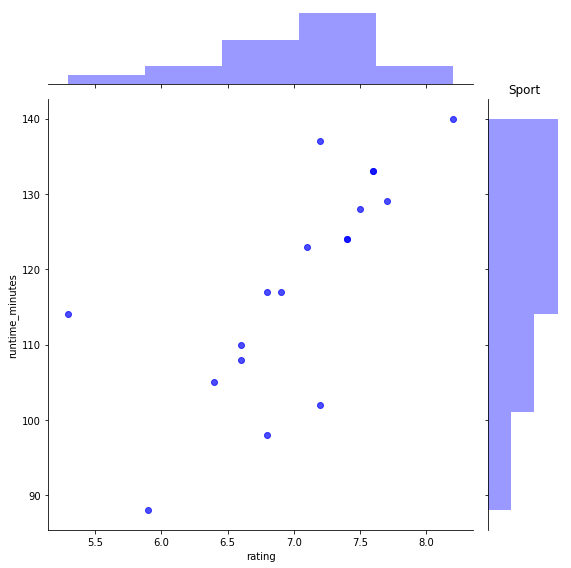

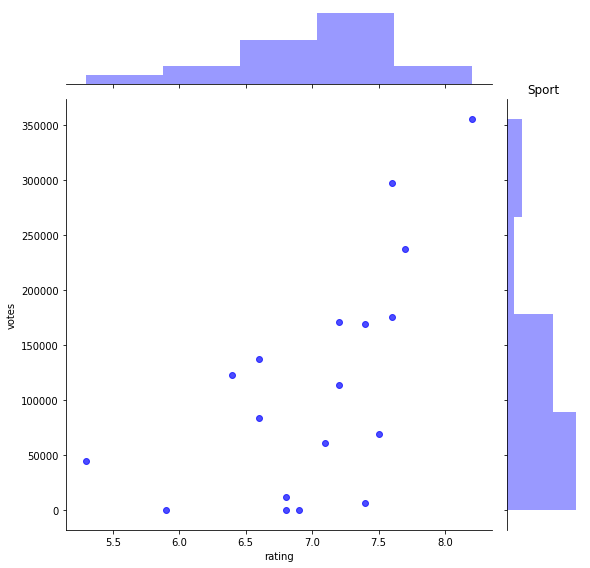

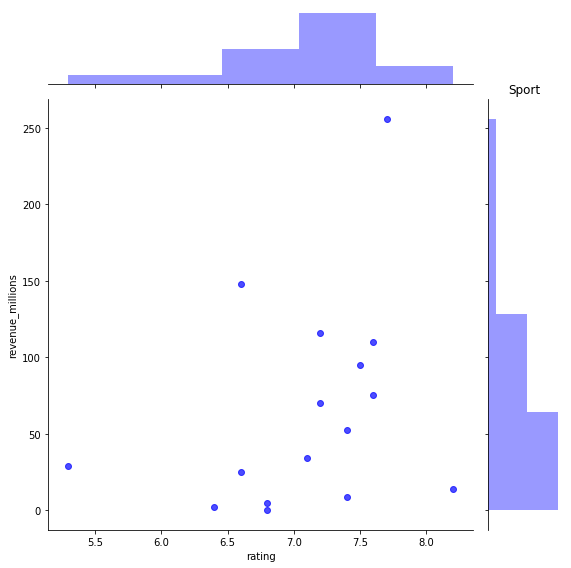

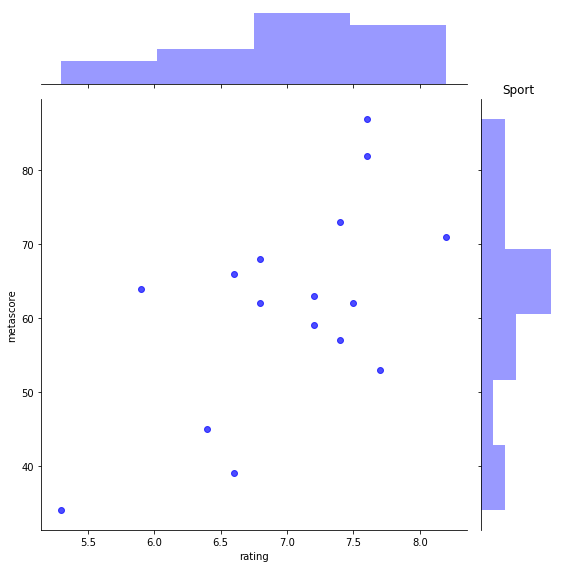

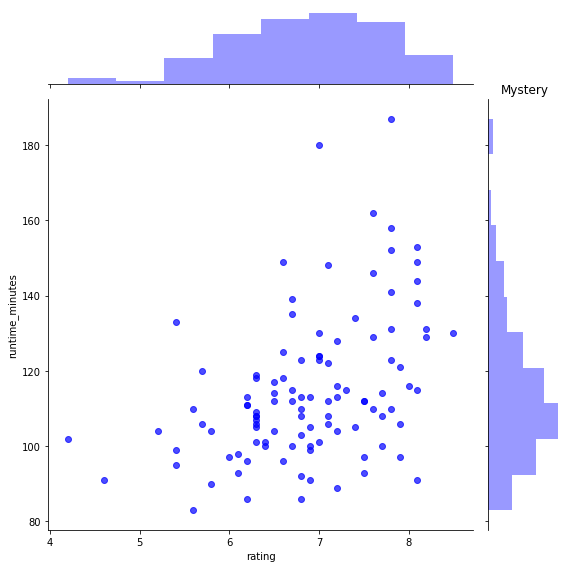

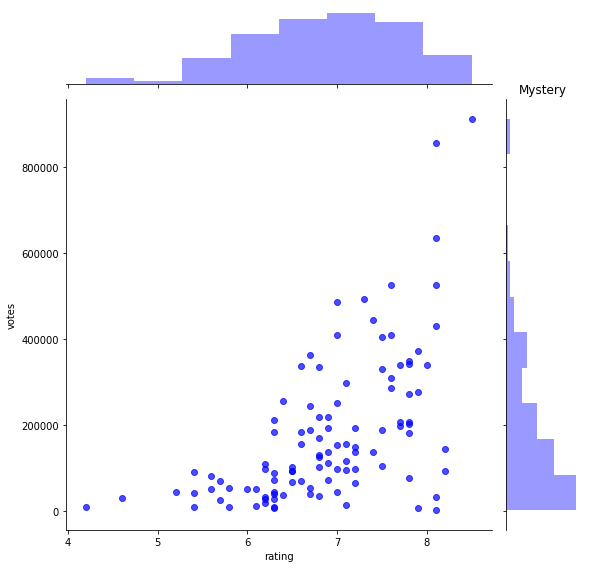

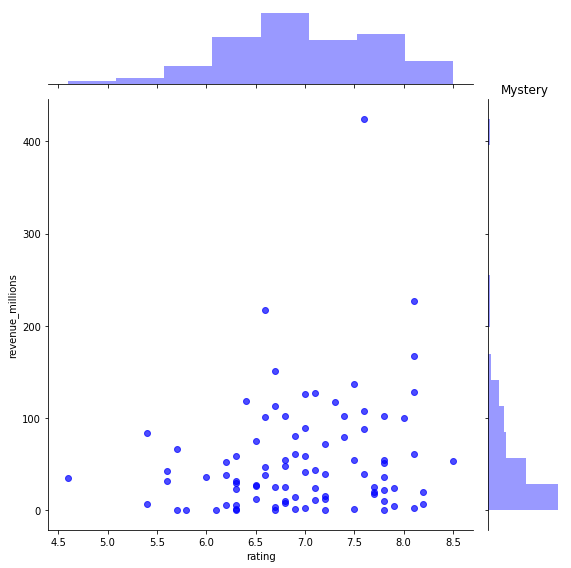

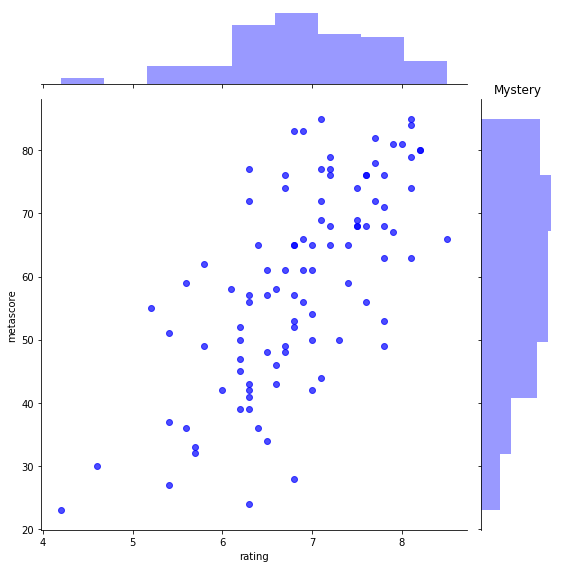

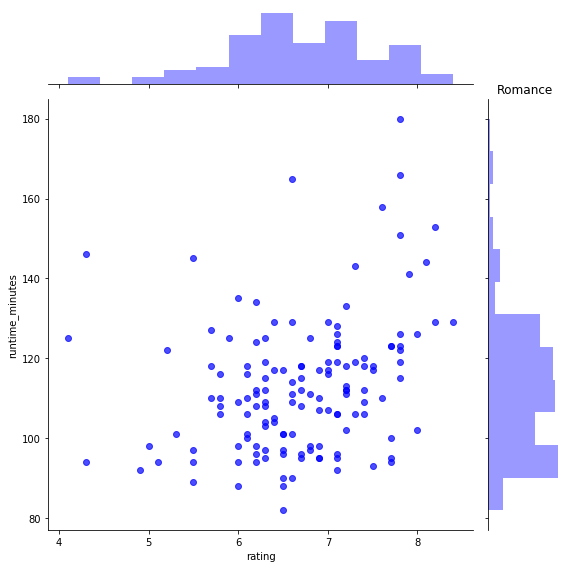

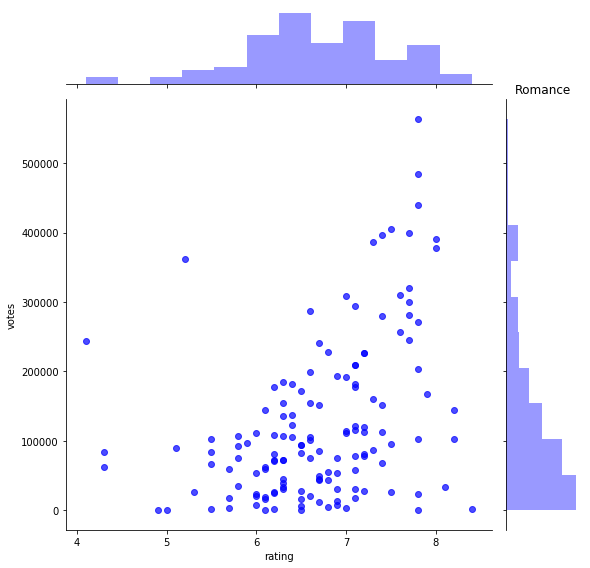

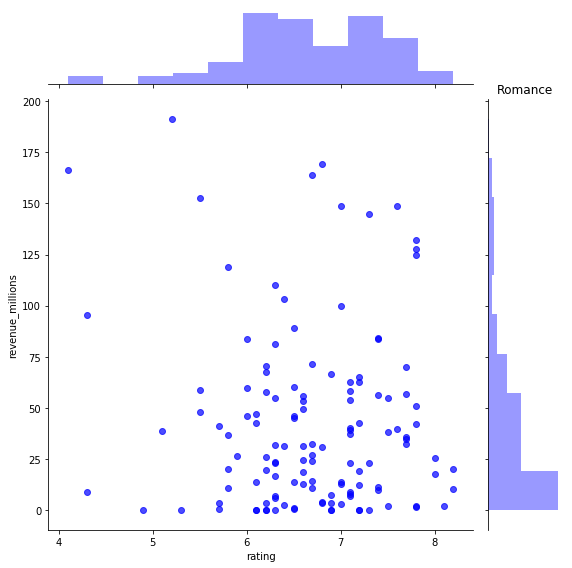

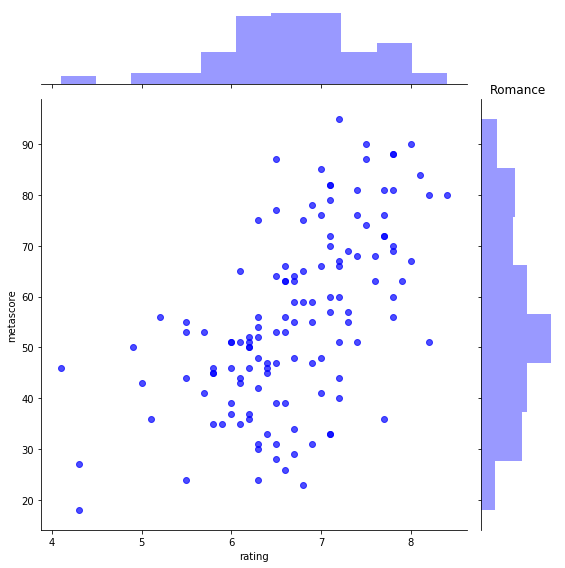

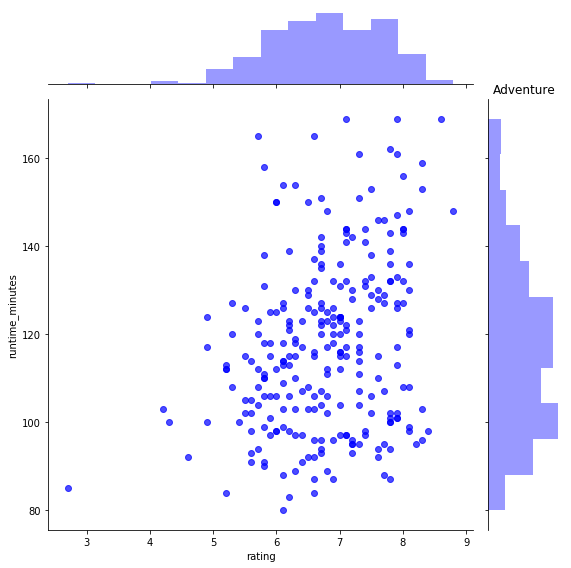

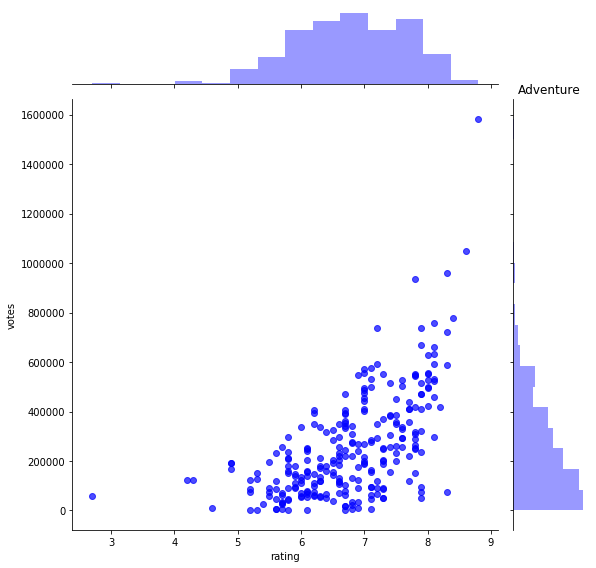

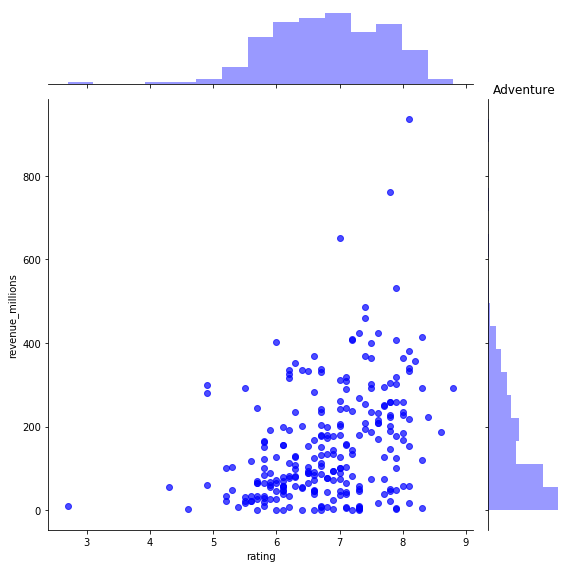

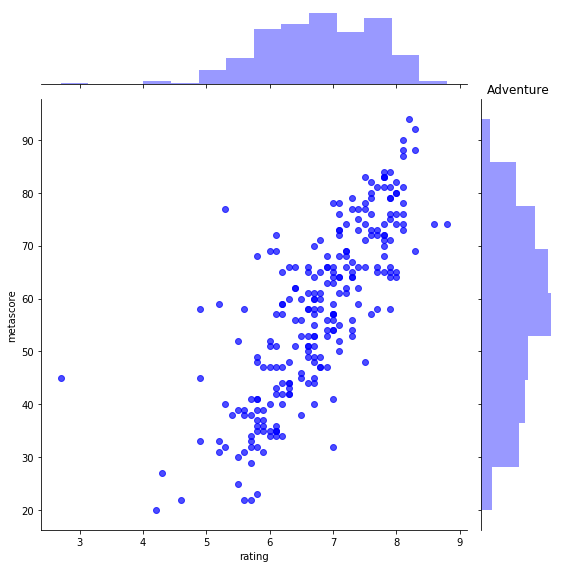

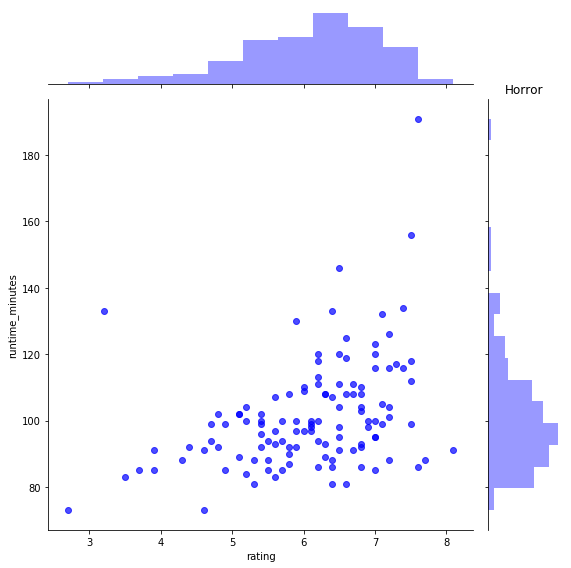

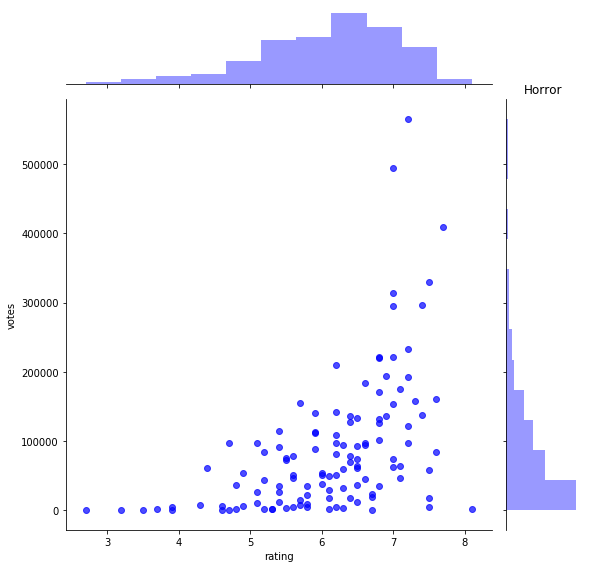

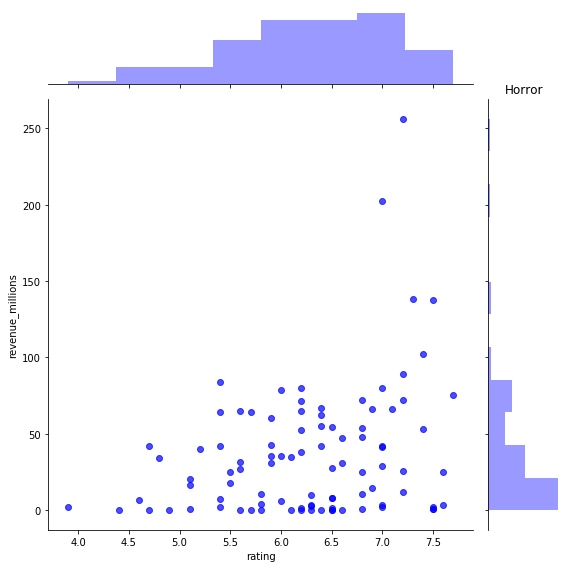

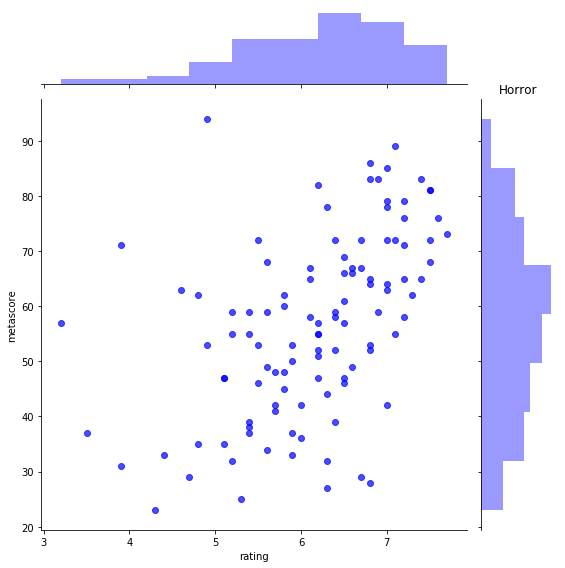

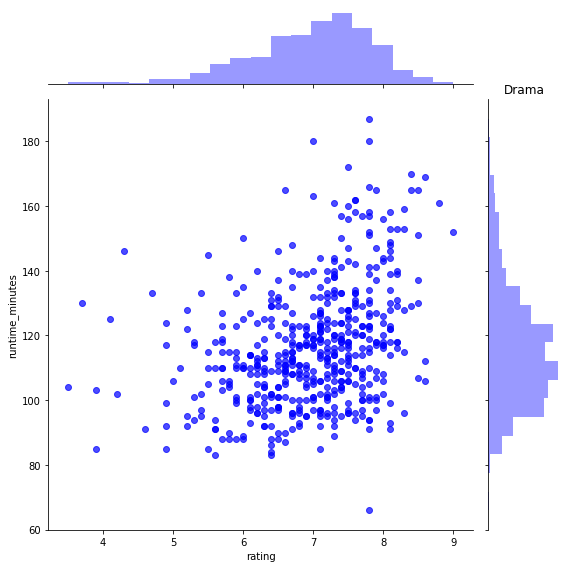

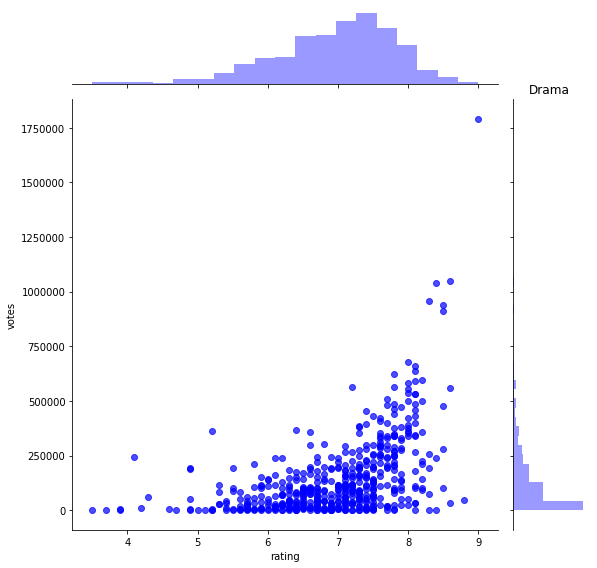

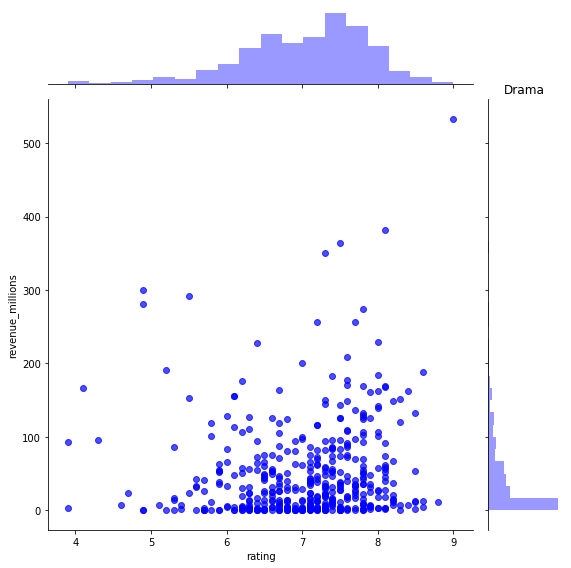

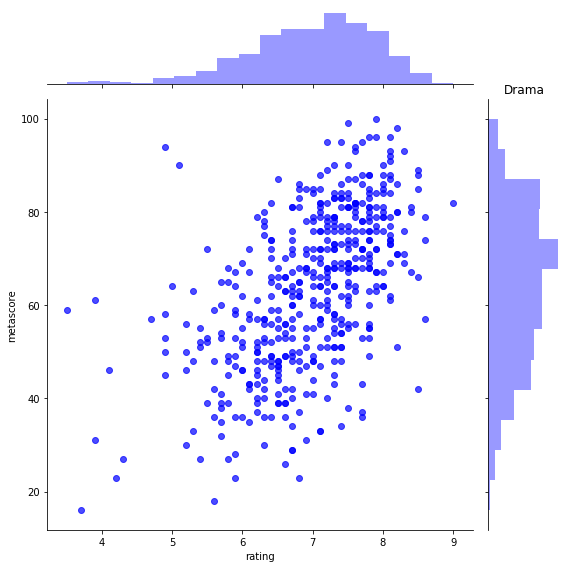

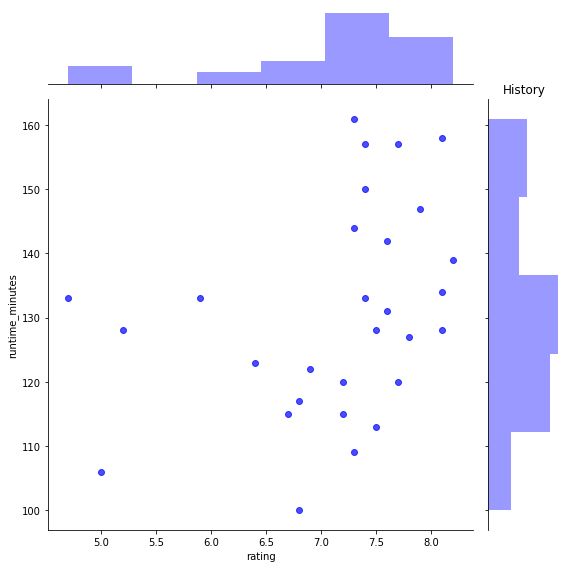

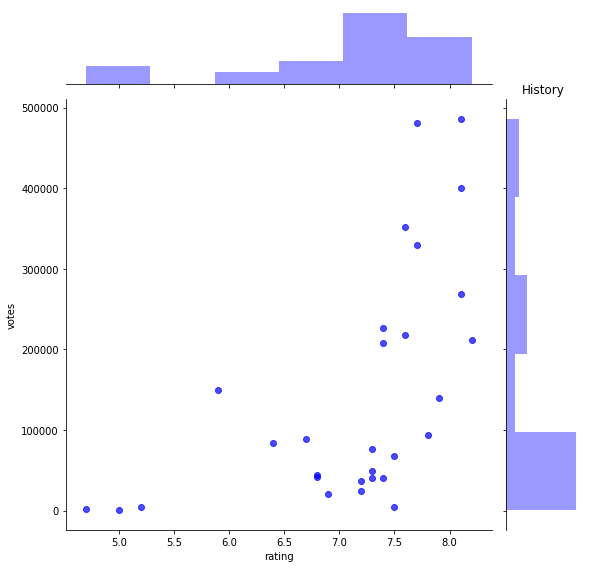

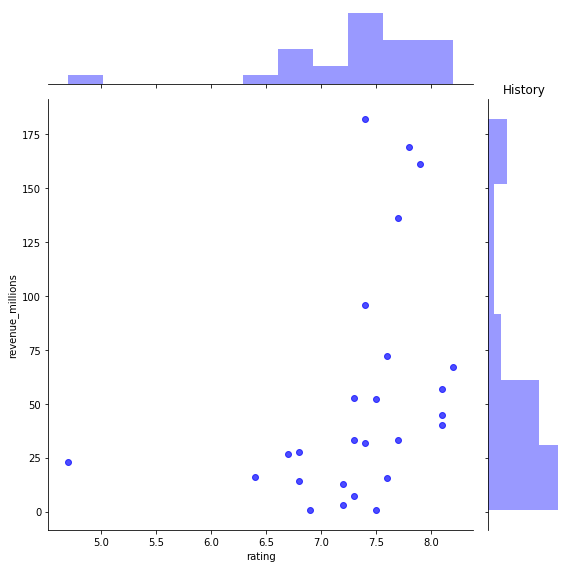

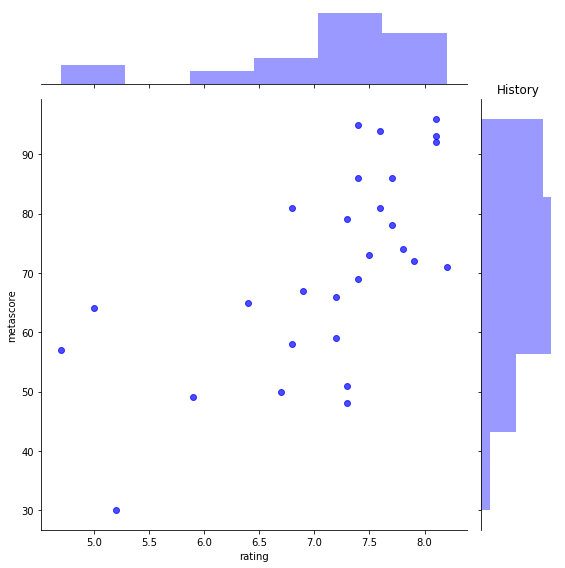

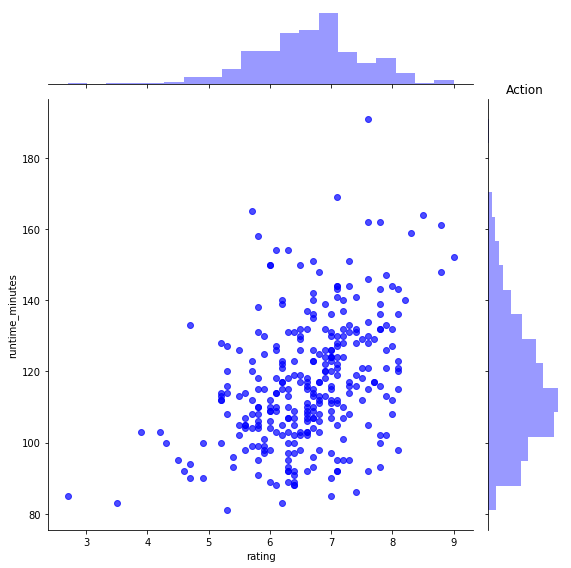

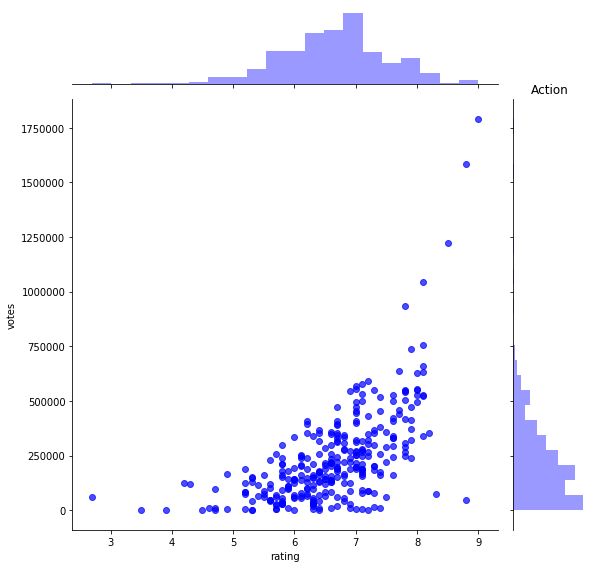

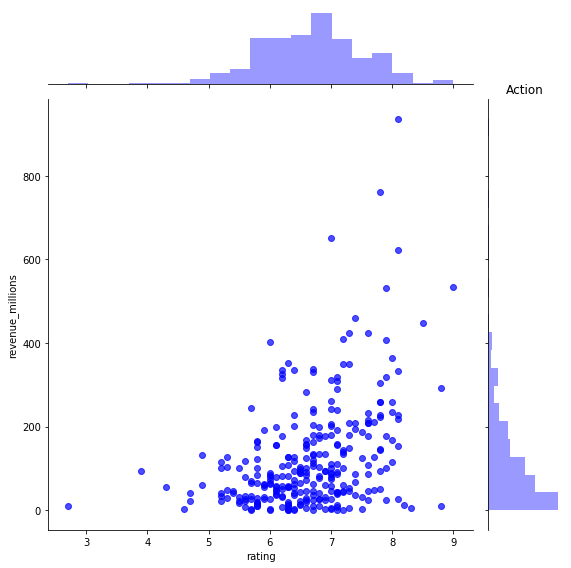

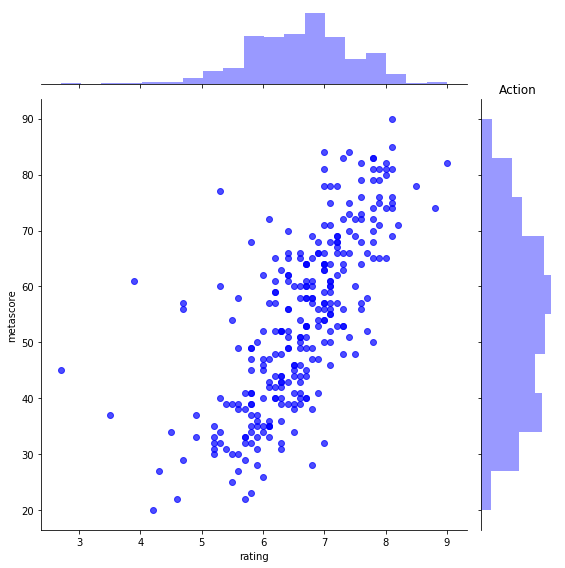

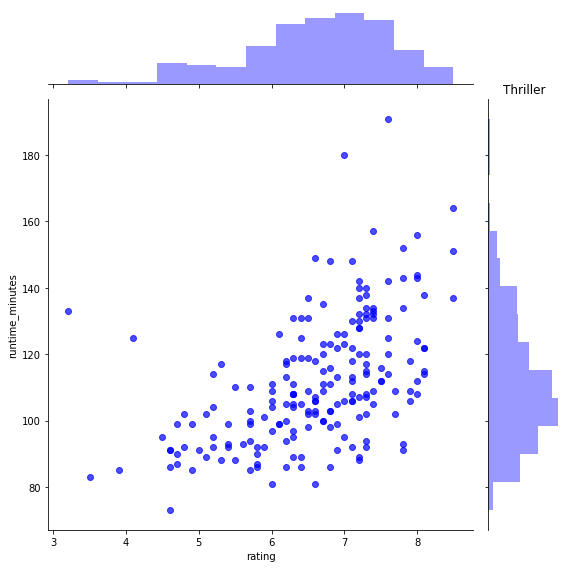

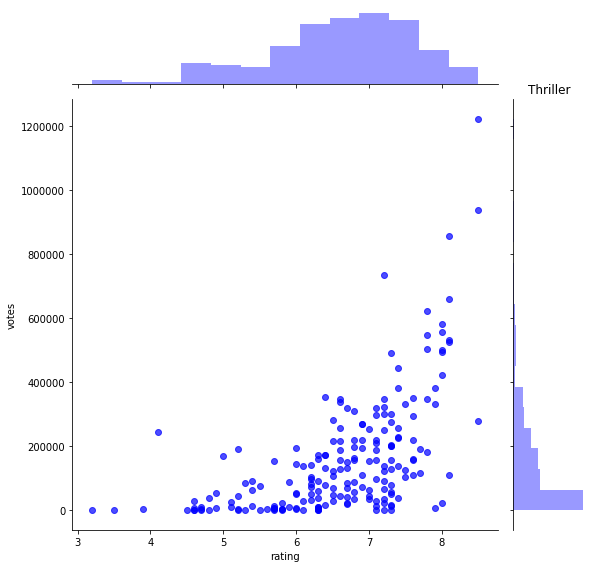

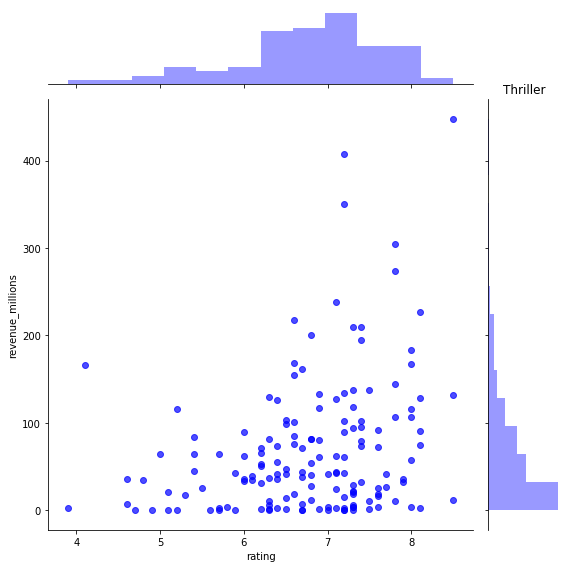

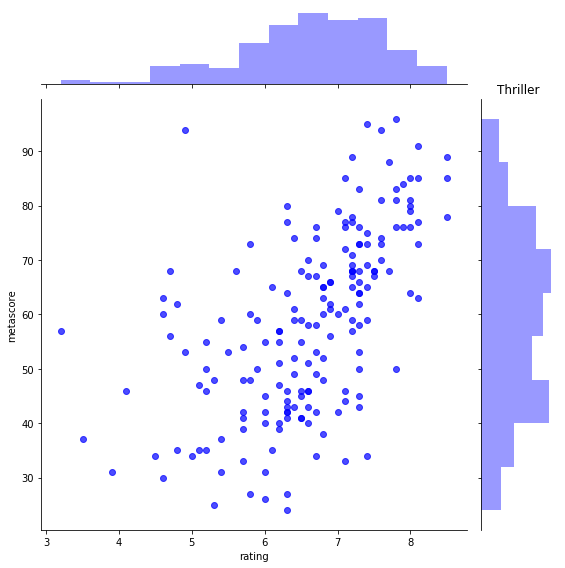

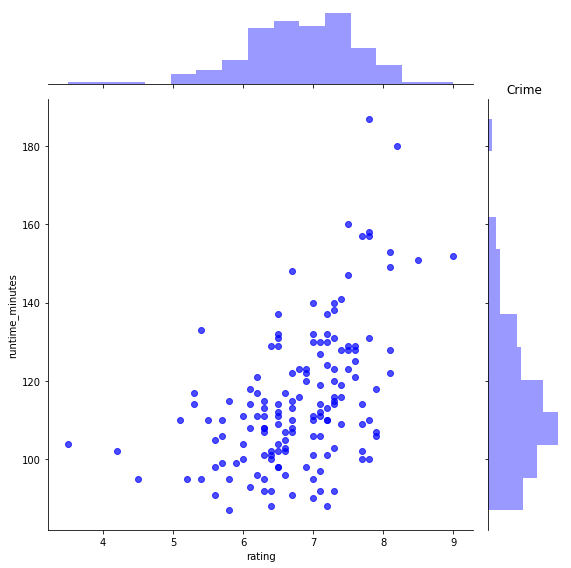

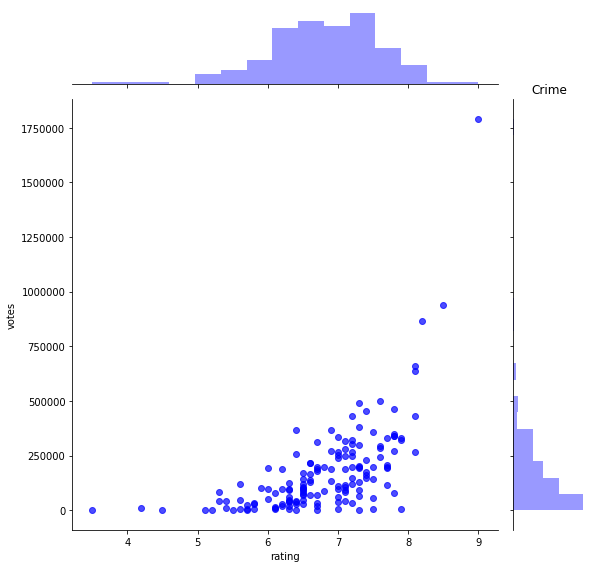

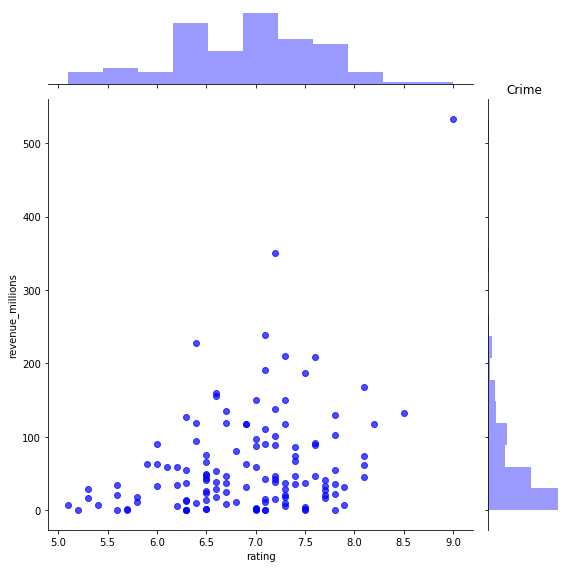

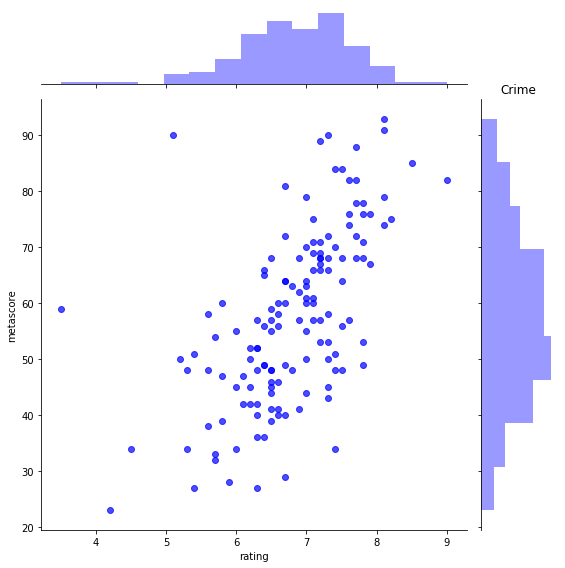

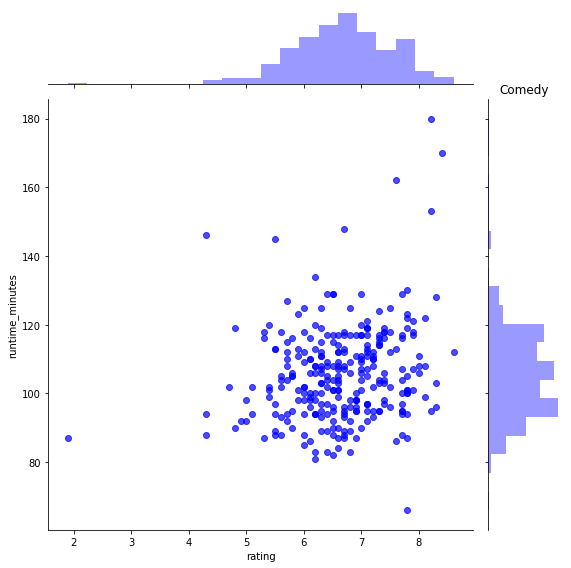

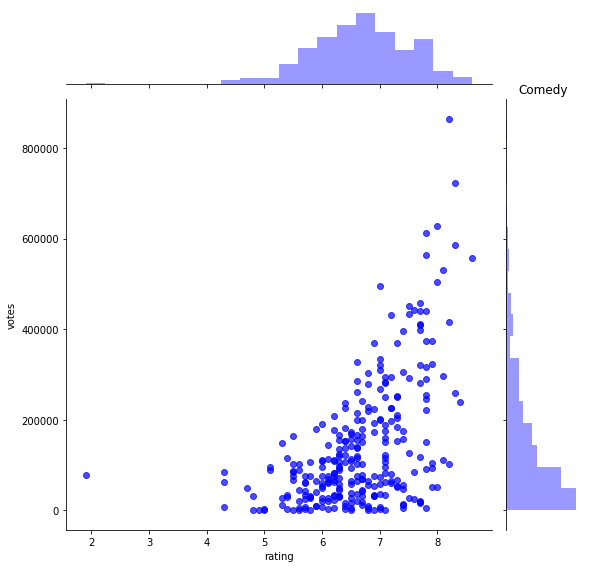

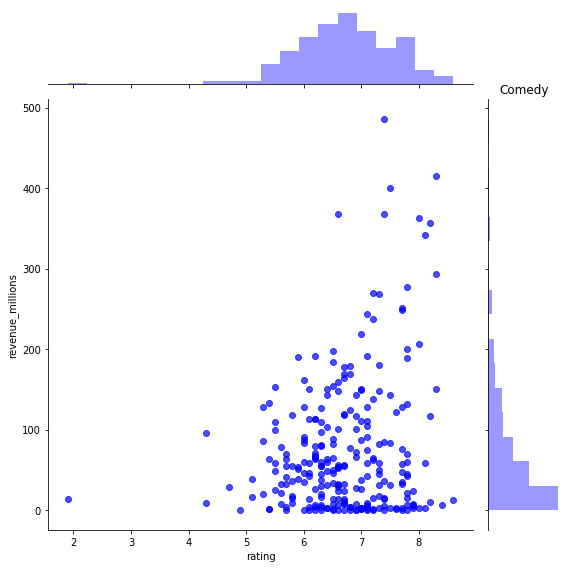

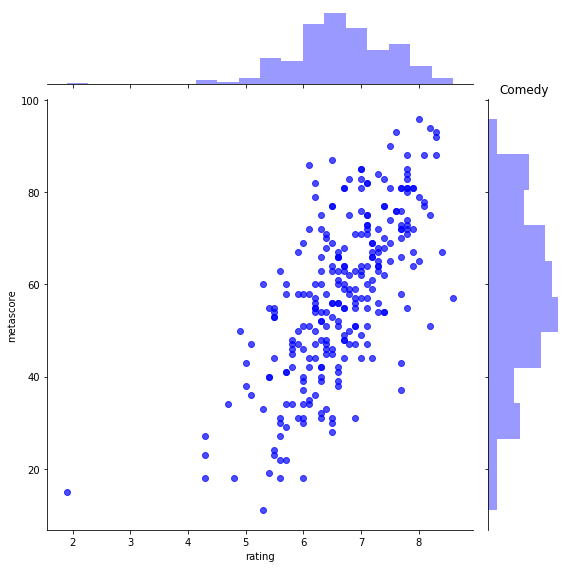

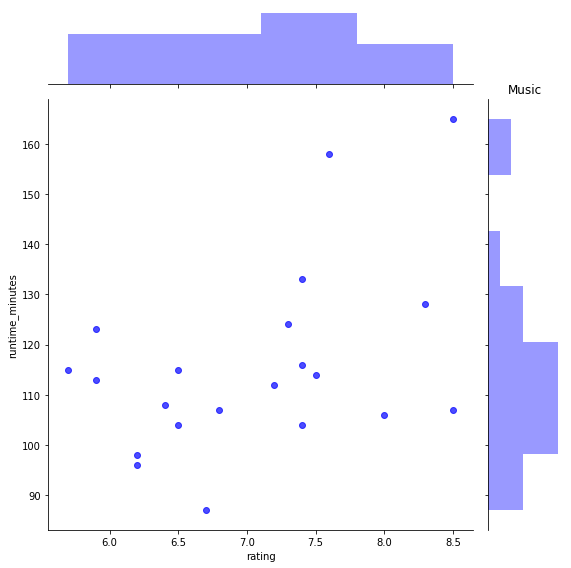

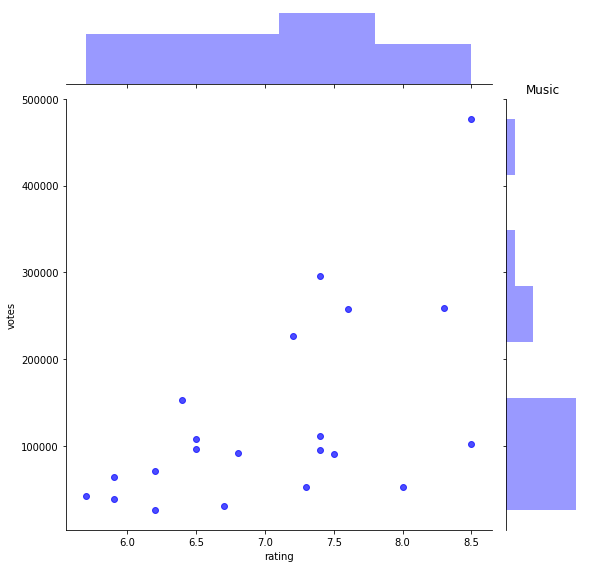

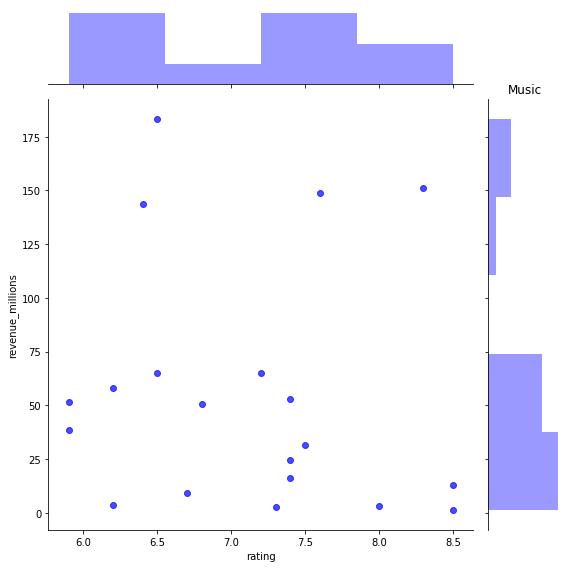

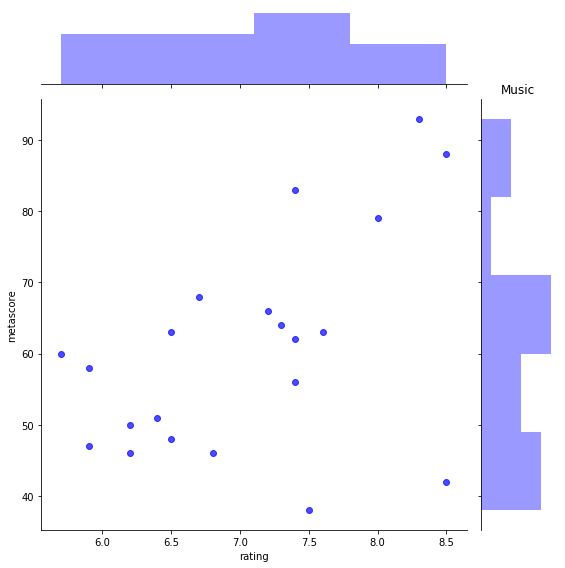

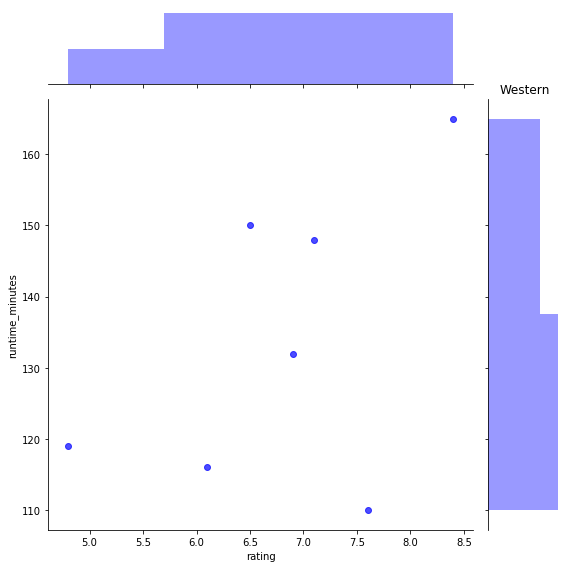

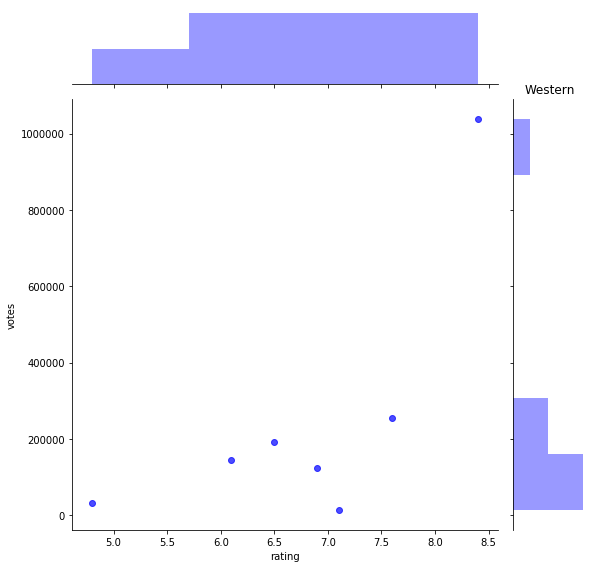

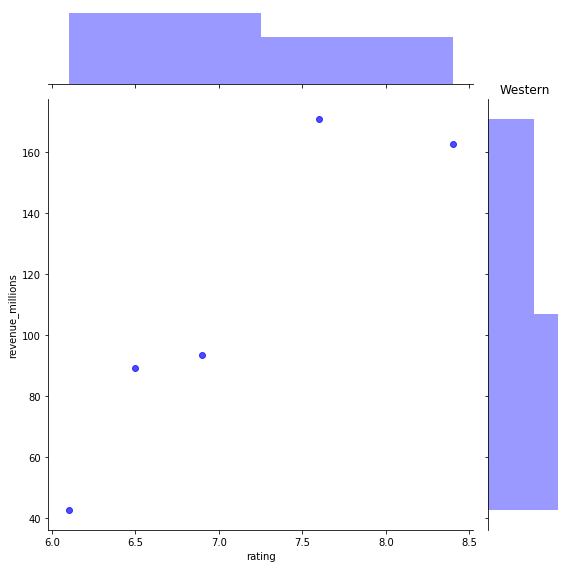

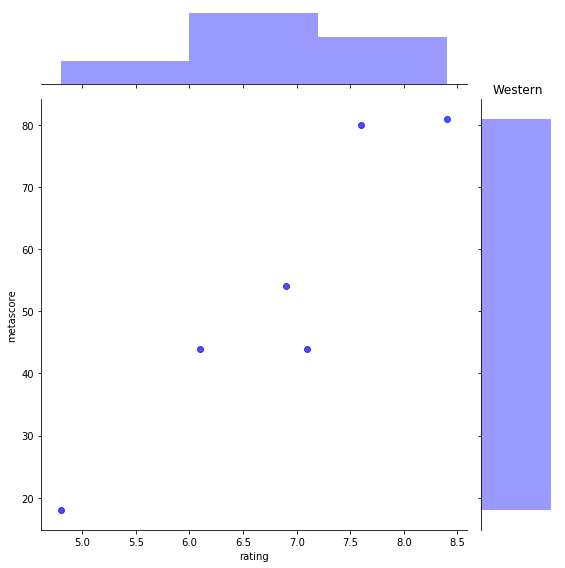

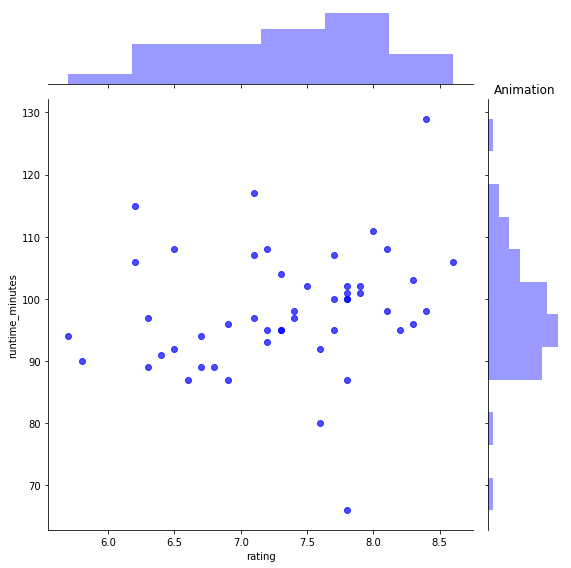

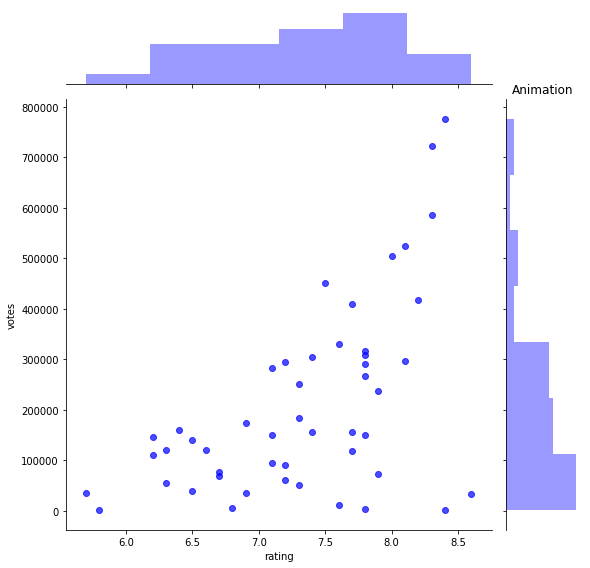

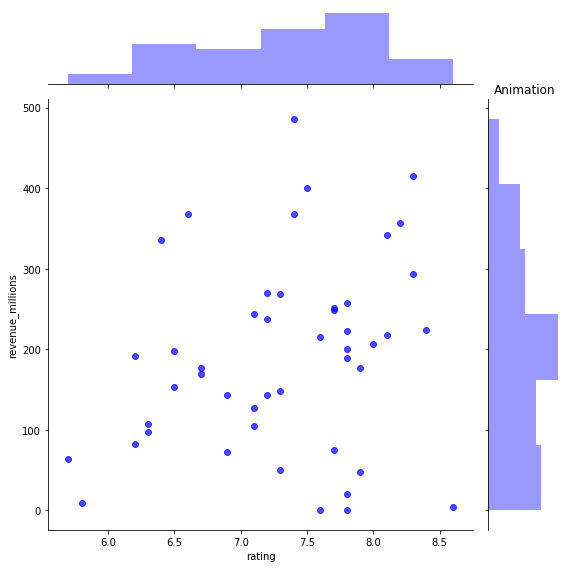

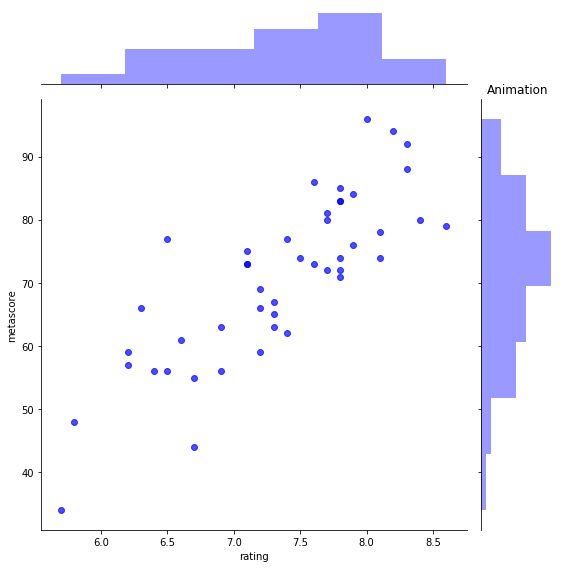

In [6]:
#диаграммы рассеивания для каждого жанра по парметрам:
#  ['runtime_minutes', 'votes','revenue_millions', 'metascore'] к 'rating'
for g in Genres:
    df = IMDB['genre'].str.contains(g).fillna(False)
    compare_movies_rating = ['runtime_minutes', 'votes','revenue_millions', 'metascore']
    for compare in compare_movies_rating:
        sns.jointplot(x='rating', y=compare, data=IMDB[df], alpha=0.7, color='b', height=8)
        plt.title(g)

In [7]:
# создаем новый датасет, с разбиением строки жанров для каждого фильма (делаем дубликаты строк фильма для каждлого жанра)
# при этом прибыль от фильма делим пропорциоально количеству жанров
feats = ['title', 'genre', 'director', 'actors', 'year',
       'runtime_minutes', 'rating', 'votes', 'revenue_millions']
new_data = pd.DataFrame(columns = feats)
for i in range(len(IMDB['genre'])):
    genres = IMDB['genre'][i].split(",")
    for word in genres:
        new_data = new_data.append({'title':IMDB['title'][i],'genre':word, 'director':IMDB['director'][i],
                                   'actors':IMDB['actors'][i], 'year':IMDB['year'][i], 
                                   'runtime_minutes':IMDB['runtime_minutes'][i], 'rating':IMDB['rating'][i],
                                   'votes':IMDB['votes'][i], 'revenue_millions':IMDB['revenue_millions'][i]/len(genres)}, 
                                   ignore_index = True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 9 columns):
title               2555 non-null object
genre               2555 non-null object
director            2555 non-null object
actors              2555 non-null object
year                2555 non-null object
runtime_minutes     2555 non-null object
rating              2555 non-null float64
votes               2555 non-null object
revenue_millions    2278 non-null float64
dtypes: float64(2), object(7)
memory usage: 179.7+ KB


In [8]:
# приведение числовых значений к числовому типу (они были объетами)
new_data[['runtime_minutes', 'votes']] = new_data[['runtime_minutes', 'votes']].apply(pd.to_numeric)
#new_data[] = pd.to_numeric(new_data['votes']);

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 9 columns):
title               2555 non-null object
genre               2555 non-null object
director            2555 non-null object
actors              2555 non-null object
year                2555 non-null object
runtime_minutes     2555 non-null int64
rating              2555 non-null float64
votes               2555 non-null int64
revenue_millions    2278 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 179.7+ KB


Text(0.5, 1.05, 'Correlation Matrix')

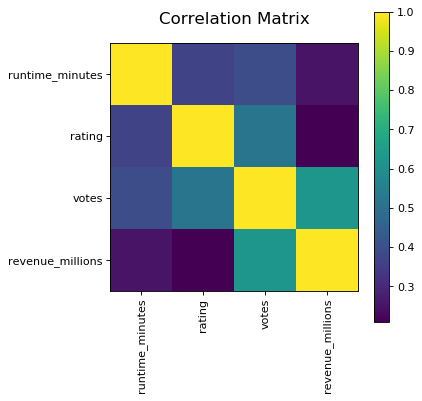

In [14]:
#коррелационная матрица и диаграмма для всех числовых параметров
corr = new_data[feats].corr()
plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)

In [16]:
corr

,runtime_minutes,rating,votes,revenue_millions
runtime_minutes,1.000000,0.371439,0.395747,0.251918
rating,0.371439,1.000000,0.516762,0.209839
votes,0.395747,0.516762,1.000000,0.624333
revenue_millions,0.251918,0.209839,0.624333,1.000000


из корреляционной матрицы можно сделать выводы:
1. имеется низкая линейная зависимость между параметрами  revenue_millions/rating, revenue_millions/runtime_minutes	
2. умеренная связь runtime_minutes/rating, runtime_minutes/votes
3. заметная связь rating/votes,  votes/revenue_millions

In [10]:
#подсчет частоты жанров
Genre_count = Counter(new_data['genre'])
Genre_count

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})

In [11]:
#переводим частотный словарь жанров к списку кортежей для сортировки и преобразования в датафрейм
g_sort = list(Genre_count.items()) 
g_sort.sort(key=itemgetter(1))
df_genres = pd.DataFrame(g_sort, columns = ['genre', 'counts'])

In [12]:
#сделаем группировку фильвом по жанрам с подсчетам средних значений всех числовых параметров фильма
group_genre_mean = pd.DataFrame(new_data.groupby('genre', as_index = False).mean())

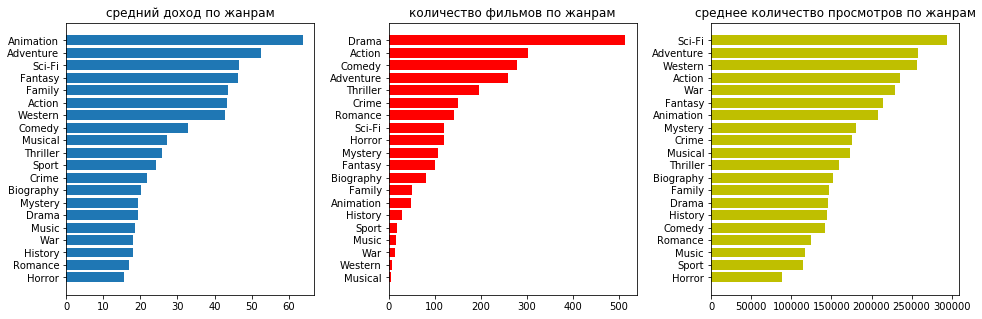

In [13]:
#построение bar-диаграмм для датасета с группировкой по жанрам
fig = plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)

group_genre_mean.sort_values(by=['revenue_millions'], inplace=True)
ax1 = fig.add_subplot(131)
ax1.barh(group_genre_mean['genre'], group_genre_mean['revenue_millions']);
ax1.set_title('средний доход по жанрам');

ax2 = fig.add_subplot(132)
ax2.barh(df_genres['genre'], df_genres['counts'], color='r');
ax2.set_title('количество фильмов по жанрам');

group_genre_mean.sort_values(by=['votes'], inplace=True)
ax3 = fig.add_subplot(133)
ax3.barh(group_genre_mean['genre'], group_genre_mean['votes'], color='y');
ax3.set_title('среднее количество просмотров по жанрам');